## Import Libraries

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Import Dataset

In [2]:
movies = pd.read_csv(r'C:\Users\RimoNahiM\Documents\Work\CSV & Excel Files\World Of Data\movies.csv')
movies.head()

#pd.set_option('display.max_rows', None) -- SHOWS ALL THE ROWS AND COLUMN


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Cleaning the Movie Dataset

In [3]:
# Find if there any missing data int the dataset

for col in movies.columns:
    percent_missing = np.mean(movies[col].isnull())
    print('{} = {}%'.format(col, percent_missing))

name = 0.0%
rating = 0.010041731872717789%
genre = 0.0%
year = 0.0%
released = 0.0002608242044861763%
score = 0.0003912363067292645%
votes = 0.0003912363067292645%
director = 0.0%
writer = 0.0003912363067292645%
star = 0.00013041210224308815%
country = 0.0003912363067292645%
budget = 0.2831246739697444%
gross = 0.02464788732394366%
company = 0.002217005738132499%
runtime = 0.0005216484089723526%


In [4]:
# Data Types of all columns

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Change the datatype of budget & gross column

movies = movies.fillna(0)
movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [6]:
# Spliting the released info
movies[['released_month', 'released_year']] = movies['released'].str.split(',', expand=True)

# Correcting The Year Column and drop the column
movies['Year_Correct'] = movies['released_year'].astype(str).str[:5]

movies.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,released_year,Year_Correct
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,October 23,2020 (United States),2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,February 7,2020 (United States),2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,April 27,2020 (Cameroon),2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,October 1,2020 (United States),2020
7667,Tee em el,0,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0,August 19,2020 (United States),2020


In [7]:
# Drop any duplicates in dataset

movies = movies.drop_duplicates()

## Movie Dataset Analysis

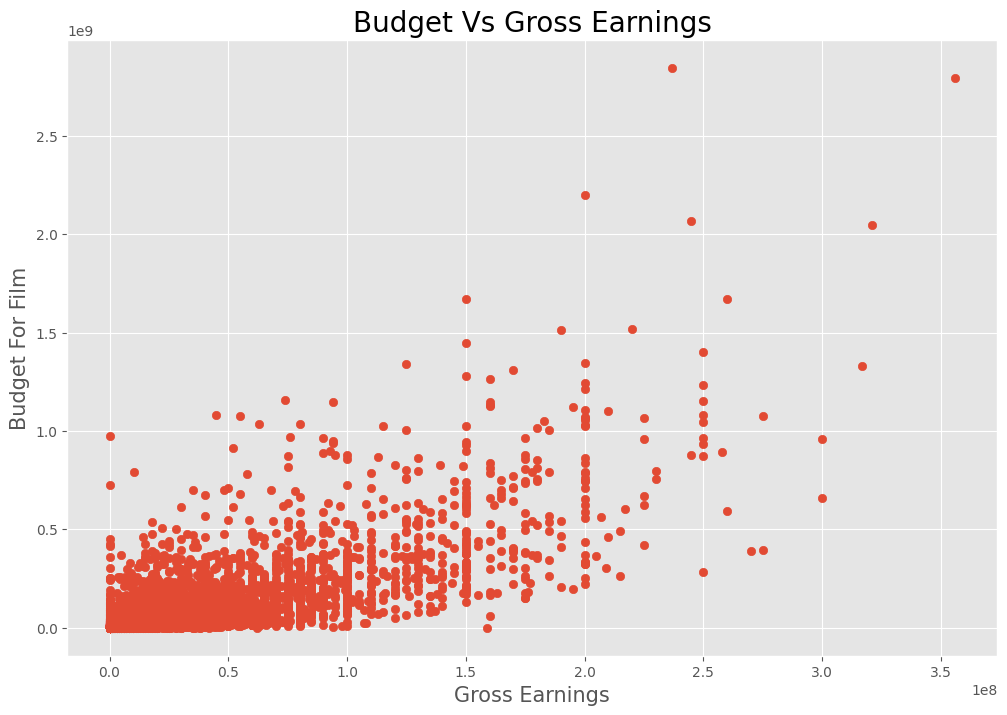

In [11]:
# Finding correlation in columns using scatter plot

plt.scatter(x=movies['budget'], y=movies['gross'])
plt.title('Budget Vs Gross Earnings', fontsize=20)
plt.xlabel('Gross Earnings', fontsize=15)
plt.ylabel('Budget For Film', fontsize=15)
plt.show()


Text(0, 0.5, 'Budget For Film')

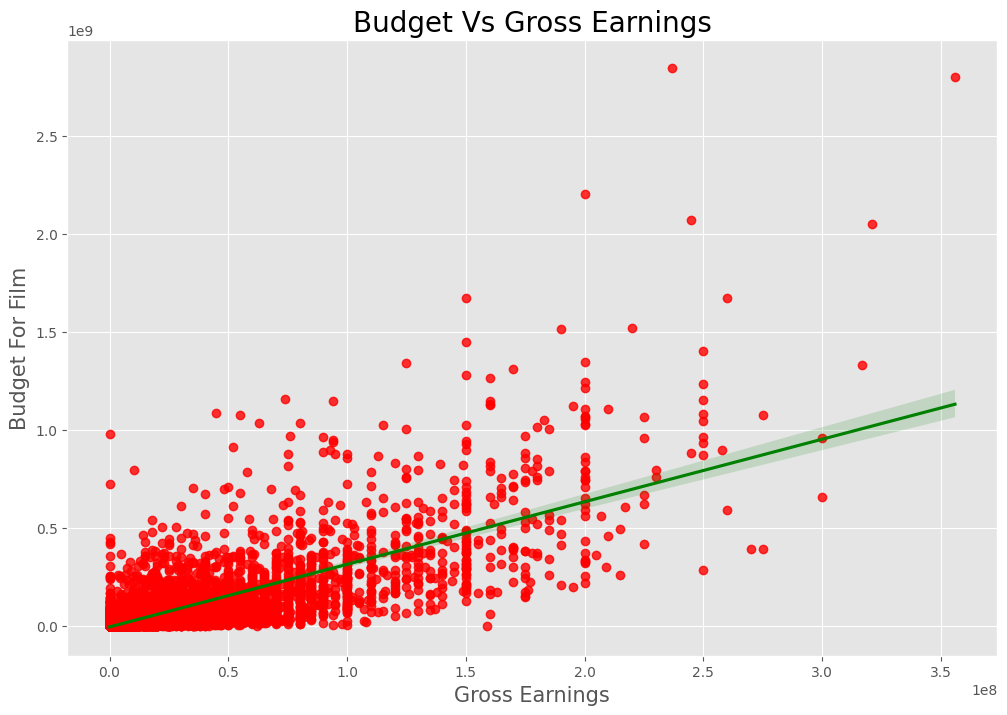

In [37]:
# Find the correlation using reg plot

sns.regplot(x='budget', y='gross', data=movies,
           scatter_kws={'color': 'red'}, 
           line_kws={'color' : 'green'})

plt.title('Budget Vs Gross Earnings', fontsize=20)
plt.xlabel('Gross Earnings', fontsize=15)
plt.ylabel('Budget For Film', fontsize=15)

In [32]:
# Looking at the correlation of numeric fields
# Method Pearson, Kendall, Spearman

Corr_matrix_Pearson = movies.corr(method = 'pearson')
#Corr_matrix_Kendall = movies.corr(method = 'kendall')
#Corr_matrix_Spearman = movies.corr(method = 'spearman')

Corr_matrix_Pearson
#Corr_matrix_Kendall
#Corr_matrix_Spearman

C:\Users\RimoNahiM\AppData\Local\Temp\ipykernel_3660\603637915.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_matrix_Pearson = movies.corr(method = 'pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


Text(0.5, 1.0, 'Correlation Matrix (PEARSON)')

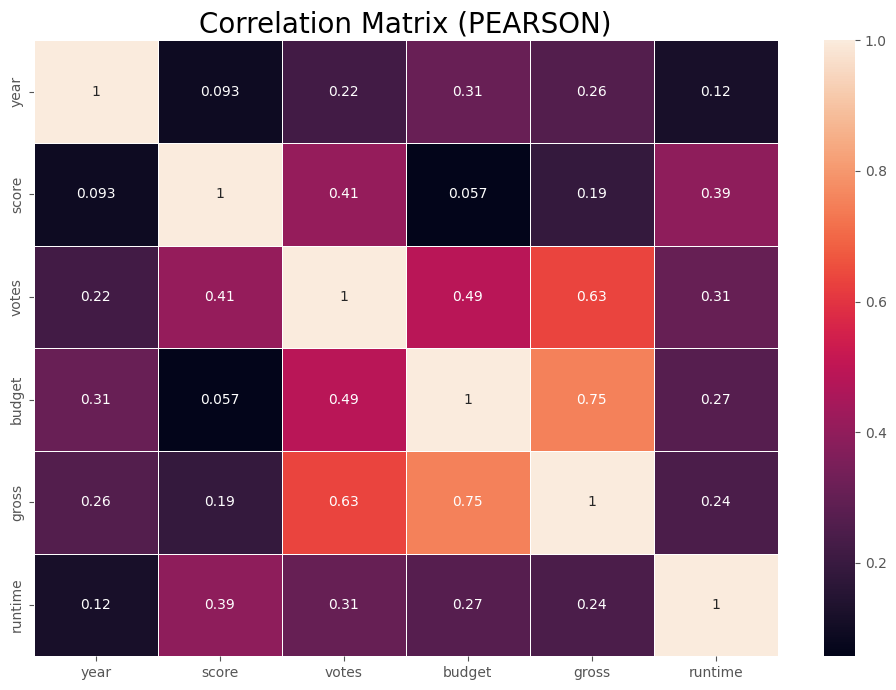

In [51]:
# There is high correlation between budget and gross earnings
# Using HeatMap to show the correlation

# For Pearson Method
sns.heatmap(Corr_matrix_Pearson, annot=True, linewidth=.5)
plt.title('Correlation Matrix (PEARSON)', fontsize=20)


Text(0.5, 1.0, 'Correlation Matrix (KENDALL)')

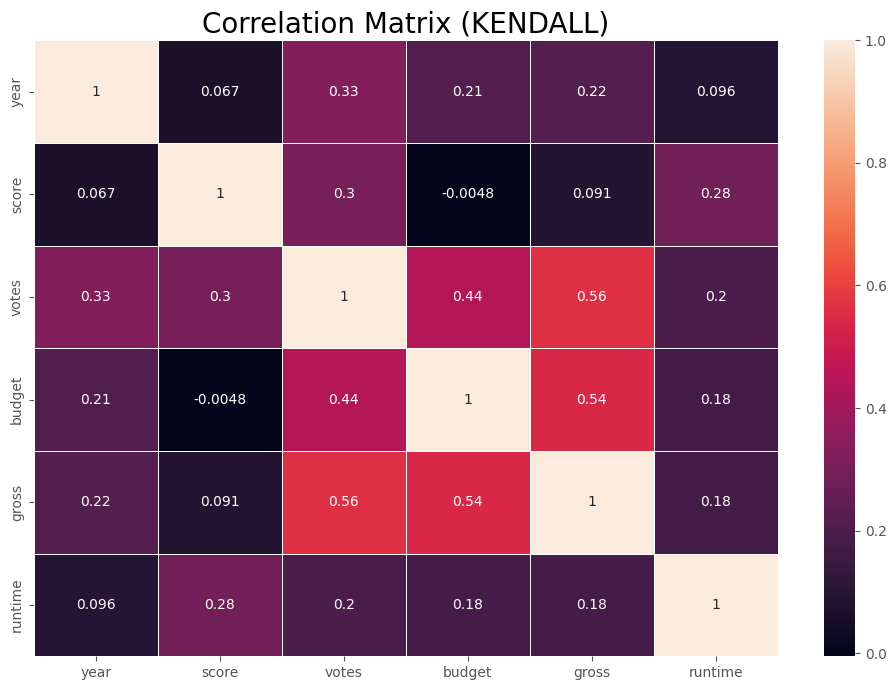

In [52]:
# For Kendall Method
sns.heatmap(Corr_matrix_Kendall, annot=True, linewidth=.5)
plt.title('Correlation Matrix (KENDALL)', fontsize=20)

Text(0.5, 1.0, 'Correlation Matrix (SPEARMAN)')

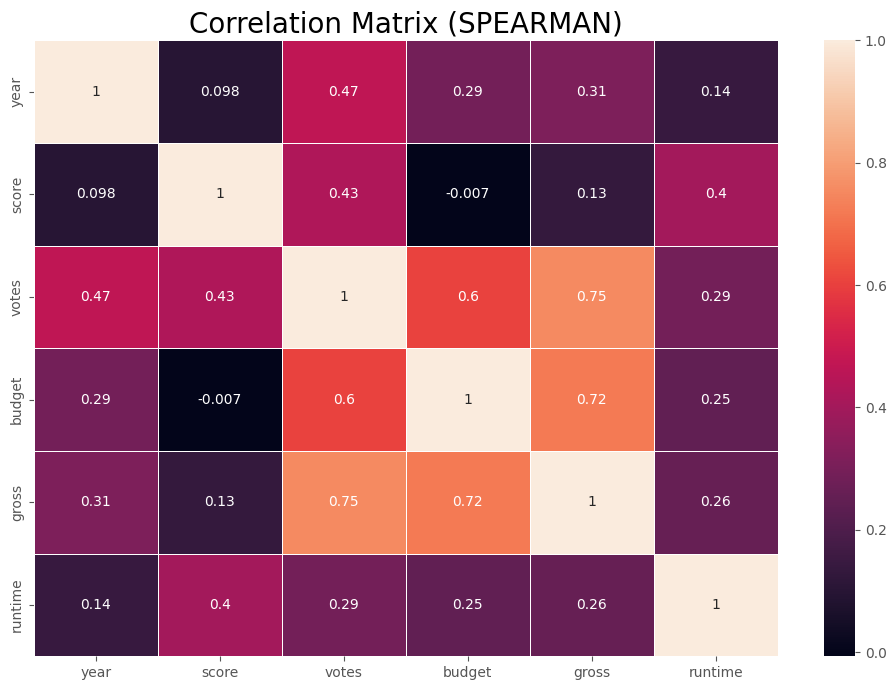

In [53]:
# For Spearman Method
sns.heatmap(Corr_matrix_Spearman, annot=True, linewidth=.5)
plt.title('Correlation Matrix (SPEARMAN)', fontsize=20)

In [57]:
# Numerized the all movie column fields

movies_numerized = movies

for col_name in movies_numerized.columns:
    if(movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes

movies_numerized.head()        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month,released_year,Year_Correct
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,212,3,0
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,188,3,0
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,223,3,0
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,188,3,0
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,194,3,0


Text(0.5, 1.0, 'Correlation of Numeric Features')

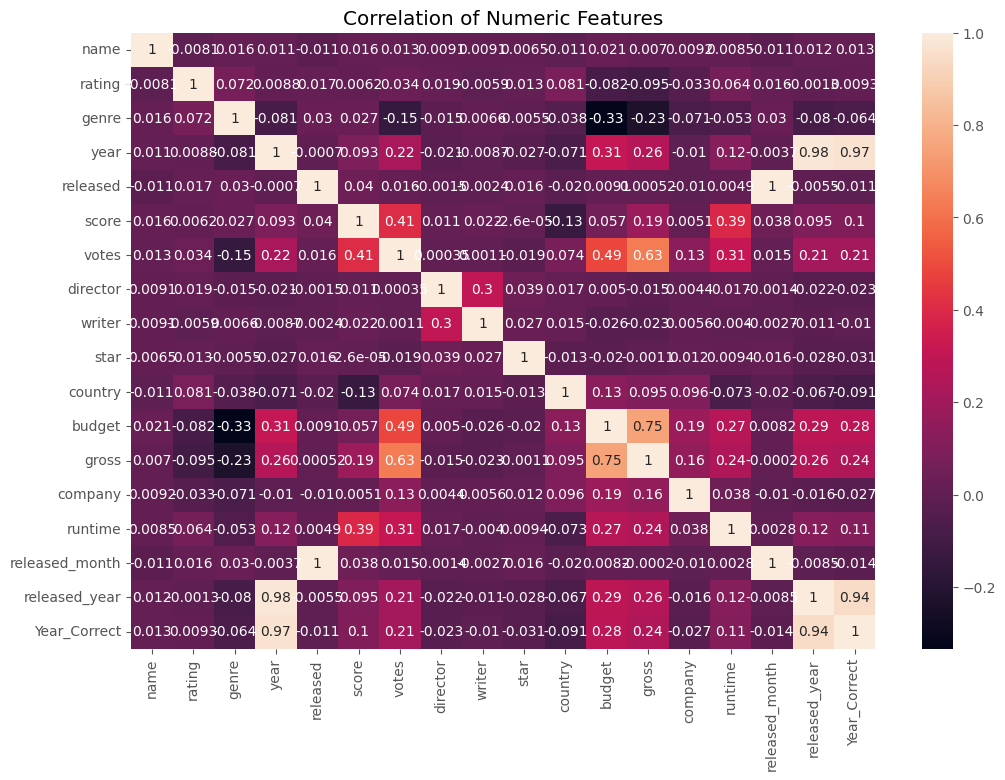

In [58]:
# HeatMap for New numerized corr_matrix

corr_matrix = movies_numerized.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation of Numeric Features')

In [64]:
# Unstacking the Numerized Correlation

Corr_Pairs = corr_matrix.unstack()
sorted_paires = Corr_Pairs.sort_values()

# Finding the High Correlation

High_Corr = sorted_paires[(sorted_paires) > 0.5]
High_Corr

gross           votes             0.632870
votes           gross             0.632870
gross           budget            0.750157
budget          gross             0.750157
released_year   Year_Correct      0.944167
Year_Correct    released_year     0.944167
year            Year_Correct      0.967465
Year_Correct    year              0.967465
released_year   year              0.980716
year            released_year     0.980716
released        released_month    0.999759
released_month  released          0.999759
name            name              1.000000
released_month  released_month    1.000000
rating          rating            1.000000
genre           genre             1.000000
year            year              1.000000
released        released          1.000000
score           score             1.000000
votes           votes             1.000000
released_year   released_year     1.000000
director        director          1.000000
star            star              1.000000
country    

In [65]:
# GROSS AND BUDGET HAS THE HIGHEST CORRELATION WHICH IS = 0.750157